# EDA - Multivariate Analysis

Multivariate analysis is when we conduct EDA for multiple features at a time. Multivariate analysis allows us to understand the relationships between our data which helps us make decisions when feeding it into our models.

### Import Basic Packages & Data 

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data to a pandas dataframe
df = pd.read_csv('phone_marketplace_dataset.csv')
df

,price,year_made,name,battery_life_percentage,storage,magnet_charging,marketplace,years_owned,visible_scratches,pro,original_sale_price,#_of_previous_owners,megapixel
0,551,2019,iPhone_11,74,64,no,kijiji,2,9,no,747,1,12
1,822,2020,iPhone_12,94,128,yes,craigslist,2,6,no,888,1,16
2,1008,2022,iPhone_13,97,256,yes,craigslist,0,2,no,1185,1,22
3,881,2021,iPhone_14,90,128,yes,craigslist,2,2,no,887,1,20
4,839,2020,iPhone_12,91,256,yes,kijiji,1,5,no,969,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1326,2022,iPhone_14,91,64,yes,craigslist,0,0,no,1394,1,22
345,458,2019,iPhone_11,75,256,no,facebook,3,3,no,702,2,12
346,487,2019,iPhone_11,87,256,no,facebook,1,7,no,781,2,12
347,1340,2022,iPhone_14,100,256,yes,craigslist,0,0,no,1411,1,22


## Continuous vs Continuous variable analysis

### Correlations between variables

The output from the correlation function provides the measure of the relationship between variables. -1 indicates a perfectly negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfectly positive linear relationship. 


In [3]:
# Description of task
df.corr()

,price,year_made,battery_life_percentage,storage,years_owned,visible_scratches,original_sale_price,#_of_previous_owners,megapixel
price,1.000000,0.932996,0.757472,0.013444,-0.728310,-0.501578,0.969247,-0.466212,0.927348
year_made,0.932996,1.000000,0.791348,0.045293,-0.778707,-0.543982,0.903629,-0.461059,0.990231
battery_life_percentage,0.757472,0.791348,1.000000,0.046787,-0.586934,-0.389451,0.711322,-0.433024,0.804617
storage,0.013444,0.045293,0.046787,1.000000,0.015829,0.019609,0.039849,0.063396,0.034712
years_owned,-0.728310,-0.778707,-0.586934,0.015829,1.000000,0.448239,-0.713480,0.373800,-0.744650
visible_scratches,-0.501578,-0.543982,-0.389451,0.019609,0.448239,1.000000,-0.493424,0.246271,-0.534336
original_sale_price,0.969247,0.903629,0.711322,0.039849,-0.713480,-0.493424,1.000000,-0.307546,0.888218
#_of_previous_owners,-0.466212,-0.461059,-0.433024,0.063396,0.373800,0.246271,-0.307546,1.000000,-0.489932
megapixel,0.927348,0.990231,0.804617,0.034712,-0.744650,-0.534336,0.888218,-0.489932,1.000000


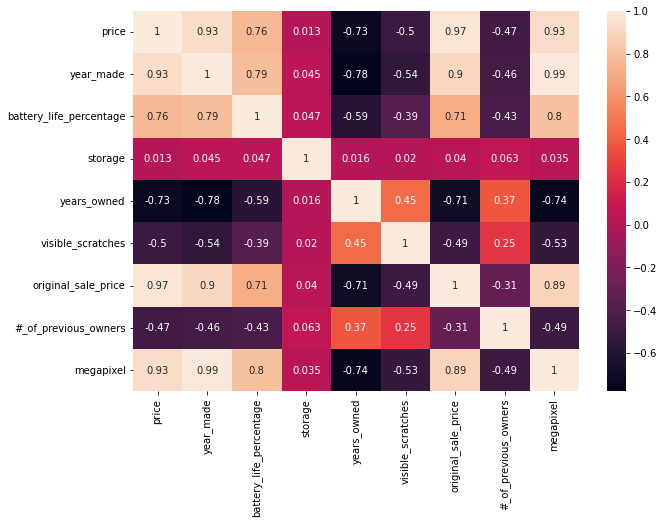

In [4]:
# Correlation matrix heatmap, default to pearson correlation
plt.rcParams['figure.figsize']=(10,7)
heatmap = sns.heatmap(df.corr(), annot=True)

### Scatter plots to visualise the correlations

Scatterplots are a great way to visualize a relationship between two variables in one graph. For example, we can plot some of the above relationships using a scatterplot:

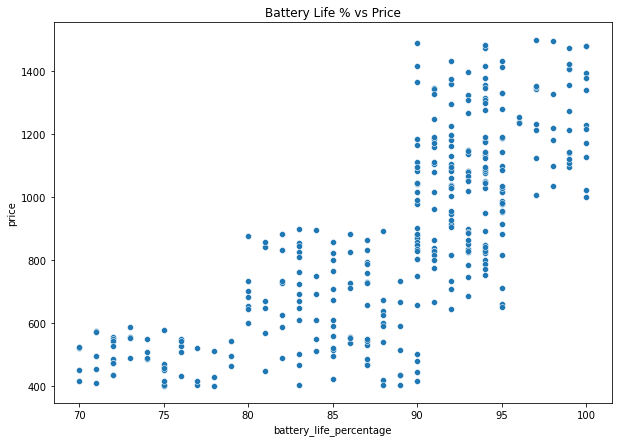

In [5]:
ax1 = sns.scatterplot(data=df, x="battery_life_percentage", y="price")
ax1.set(title = 'Battery Life % vs Price')
plt.show()

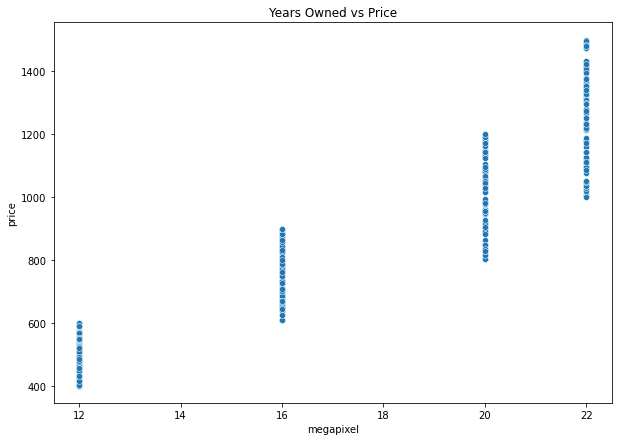

In [6]:
ax2 = sns.scatterplot(data=df, x="megapixel", y="price")
ax2.set(title = 'Years Owned vs Price')
plt.show()

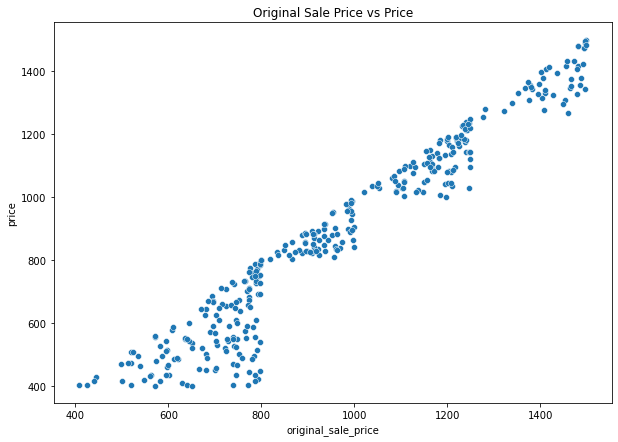

In [7]:
# Scatterplots to visualise the correlations
ax = sns.scatterplot(data=df, x="original_sale_price", y="price")
ax.set(title = 'Original Sale Price vs Price')
plt.show()

As we can see from above, scatterplots make it easy for us to visualize if there is a relationship between two variables. 

We can also enhance the use of these scatterplots by segmenting them with other categories. For example, lets look at the relationship between price and original sale price broken down by phone name.


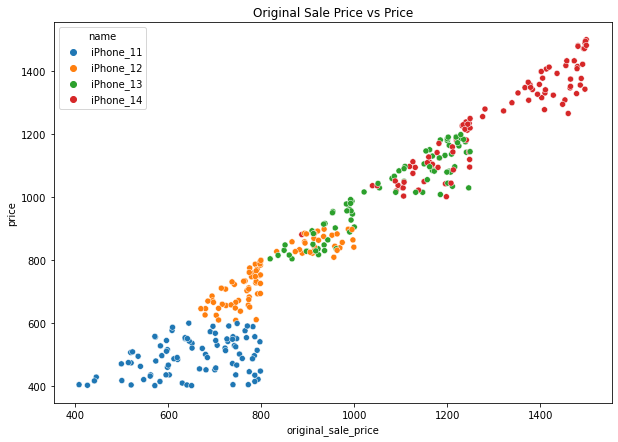

In [8]:
ax3 = sns.scatterplot(data=df, x="original_sale_price", y ="price", hue="name")
ax3.set(title = 'Original Sale Price vs Price')
plt.show()

We can see that there is a very positive correlation between original price that the phone was bought for and price, as well as the newer phones having both a higher original and selling price. This makes sense as newer phones are bought for more and sold for more.

One interesting point also is that in the clusters where multiple phone generations overlap, it gives us an insight that tells us this may be the case due to features that lower the price down despite a phone being a higher model, or vice versa.

Lets now look at the distribution of our continuous variables. 

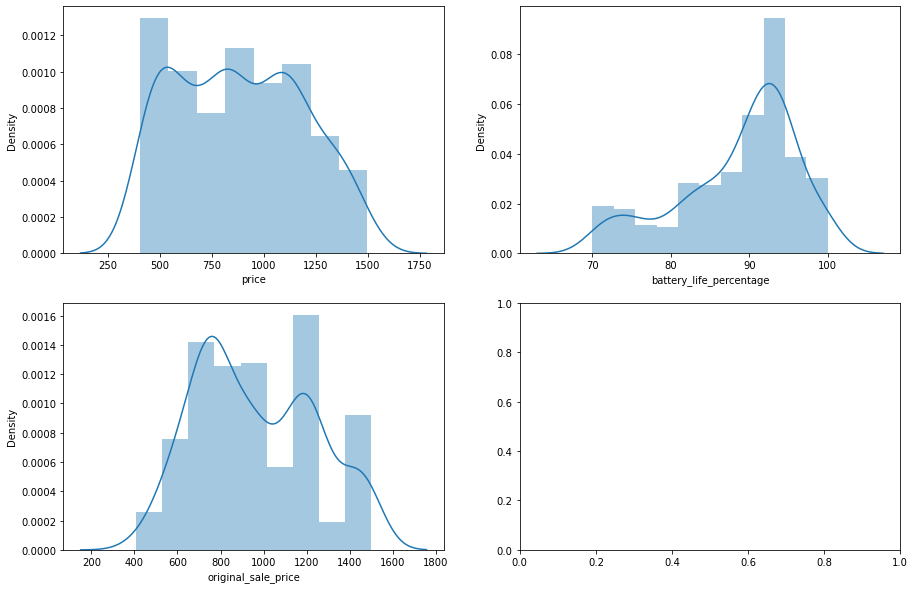

In [9]:
# figure out way to make it into one line and not two

fig, axes = plt.subplots(2,2, figsize=(15, 10))

sns.distplot(df['price'], ax=axes[0,0])
sns.distplot(df['battery_life_percentage'], ax=axes[0,1])
sns.distplot(df['original_sale_price'], ax=axes[1,0])

fig.show()

We can see that based on the distributions of these continous features, there are things such as multiple peaks and skews that is far from a "normal" distribution. This is helpful to understand how our variables are distributed.

We may want to transform some of our variables to have a different distribution. We'll look at this more in the feature engineering chapter.

## Categorical vs Continuous variable analysis

In this section, we will look at relationships between categorical and continuous features. Lets take a look at two categorical features in our data - "name" and "marketplace".

What we want to do:

- Identify summary statistics by categorical variables 
- Create box plots using categorical variables, viewing distributions by category

In [20]:
df.groupby("name")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
iPhone_11,89.0,495.213483,58.711829,402.0,446.00,497.0,545.00,600.0
iPhone_12,85.0,759.329412,85.997424,609.0,683.00,753.0,833.00,898.0
iPhone_13,81.0,1013.135802,124.003906,804.0,905.00,1029.0,1124.00,1198.0
iPhone_14,94.0,1242.638298,149.731146,881.0,1109.25,1252.0,1355.75,1499.0


In [21]:
df.groupby("marketplace")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
marketplace,,,,,,,,
craigslist,113.0,908.371681,288.975907,402.0,666.00,885.0,1124.00,1478.0
facebook,128.0,862.390625,302.255334,404.0,597.75,828.0,1106.75,1489.0
kijiji,108.0,874.601852,325.879226,402.0,553.25,922.0,1133.00,1499.0


<AxesSubplot:xlabel='name', ylabel='price'>

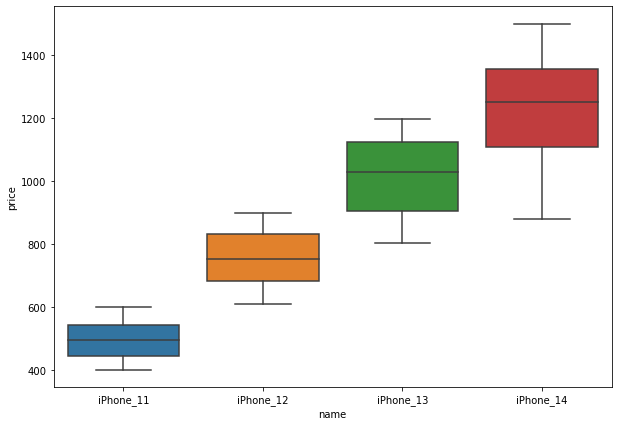

In [28]:
sns.boxplot(data=df, x="name", y="price")

<AxesSubplot:xlabel='marketplace', ylabel='price'>

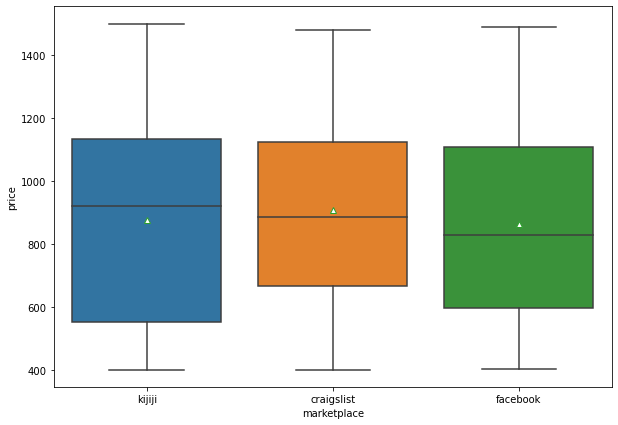

In [29]:
sns.boxplot(data=df, x="marketplace", y="price", showmeans = True, meanprops={"markerfacecolor":"white"})

Some key notes from the outputs above:

- At the same time interestingly the average price for phones is higher in craigslist compared to other marketplaces. This may be because there are more newer phones or there is a premium when selling phones in this marketplace which would require more investigation to confirm.
- iphone 11 has distribution completely separate 
- iphone 14 has biggest spread in price - a wider spread suggests a larger upside or downside potential when buying an iphone 14
- All marketplaces have a similar spread of prices

### Categorical vs Categorical variable analysis

In this section we look at relationships between categorical variables

With categorical variables, we can see the relationship between them by segementing the output of a categorical and continuous variable relationship.

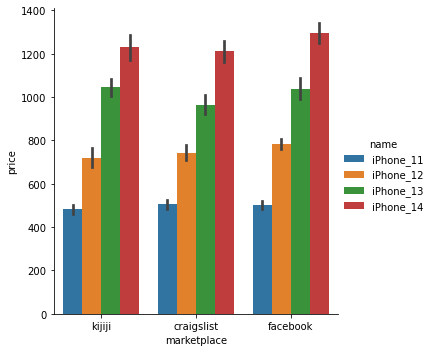

In [37]:
# Multi-level bar chart created by segmenting a relationship between marketplace and price with name of phone
sns.catplot(data=df, x="marketplace", y="price", hue = 'name', kind='bar')

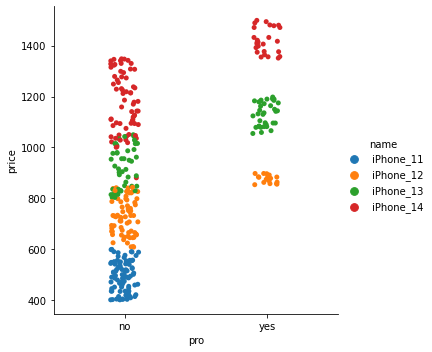

In [38]:
# Multi-level scatter chart created by segmenting the relationship between pro and price with name of phone
sns.catplot(data=df, x="pro", y="price", hue = 'name')

Key notes from the outputs above:
- Interestingly, the average price for all phone models on facebook are higher relative to other marketplaces
- There are no pro models for iPhone 11s across all marketplaces
- There is a chance that iPhone 14 models can go for as cheap as iPhone 13 models if it is not a pro model but there are no instances of that if the phone is a pro model.



### Exercise 1- Creating plots and statistics to find relationships between continuous data

Using descriptive statistics and scatter plots, determine the relationship between starting_price and ending_price. How do they differ?

Task:
- Create descriptive statistics for starting_price and ending price. 
- Create a scatter plot to illustrate the relationship between starting_price and ending_price.
- What differences can you observe?

In [54]:
df_cars = pd.read_csv('indian_cars_dataset.csv')
df_cars

,ending_price,starting_price,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,fuel_type,engine_displacement,transmission_type,body_type,car_name
0,583000,399000,51,89.0,3500,65.71,5500,27.0,3,4.5,5.0,Petrol,998,Automatic,Hatchback,Maruti Alto K10
1,1396000,799000,86,136.8,4400,101.65,6000,48.0,4,4.5,5.0,Petrol,1462,Automatic,SUV,Maruti Brezza
2,1603000,1353000,242,300.0,2800,130.00,3750,57.0,4,4.5,4.0,Diesel,2184,Automatic,SUV,Mahindra Thar
3,2458000,1318000,313,450.0,2800,182.38,3500,60.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra XUV700
4,2390000,1199000,107,400.0,2750,172.45,3500,57.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra Scorpio-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,999000,659000,35,500.0,5250,415.71,6750,0.0,4,4.5,5.0,Petrol,1991,Automatic,Hatchback,Mercedes-Benz AMG A 45 S
199,1041000,1041000,3,400.0,4400,254.79,5000,59.0,4,4.5,5.0,Petrol,1998,Automatic,Sedan,BMW 3 Series Gran Limousine
200,2075000,1615000,2,350.0,2500,167.67,3750,60.0,4,4.5,7.0,Diesel,1956,Manual,SUV,MG Hector Plus
201,21700000,21700000,9,800.0,4500,591.39,6000,85.0,8,3.5,5.0,Petrol,3998,Automatic,SUV,Audi RS Q8


In [55]:
# Descriptive stats for starting and ending price
# Last bit of code just to format the numbers to whole numbers

df_cars[['starting_price','ending_price']].describe().applymap('{:,.0f}'.format)

,starting_price,ending_price
count,203,203
mean,"9,443,640","11,120,054"
std,"13,570,354","15,517,463"
min,"339,000","361,000"
25%,"945,500","1,407,500"
50%,"4,312,000","4,600,000"
75%,"11,600,000","15,750,000"
max,"70,600,000","90,000,000"


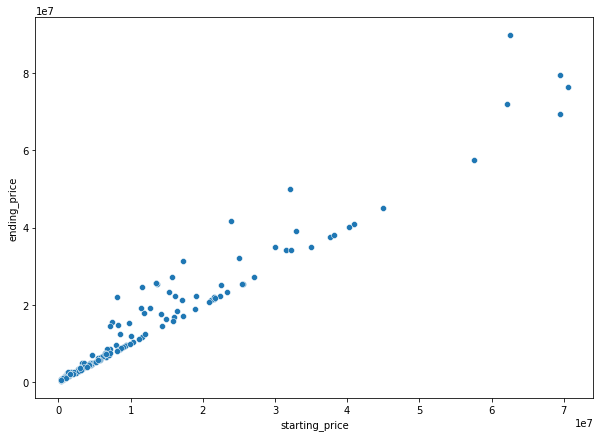

In [56]:
sns.scatterplot(data=df_cars, x="starting_price", y="ending_price")
plt.show()

Observations from output: Starting and ending prices are highly positive correlated based on the scatterplot, and the starting and ending prices are very similar. The min, mean and max ending prices are higher than the starting prices. 



### Exercise 2 - Creating plots to find relationships between categorical & categorical data

Using plots, determine the relationship between starting_price and fuel_type / transmission_type. What are the trends?

Task:
- Create multilevel box chart of starting price by transmission_type and fuel_type
- What insights can you observe?

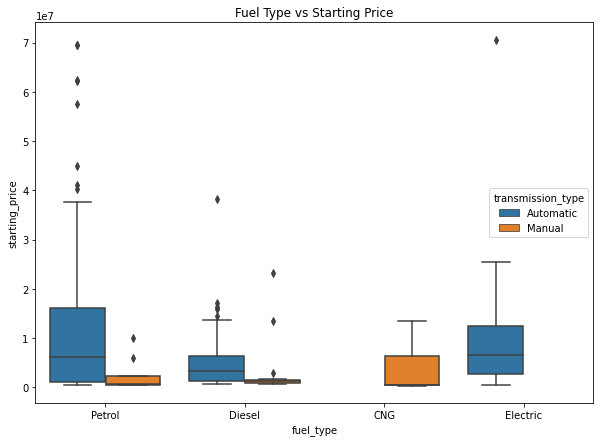

In [59]:
sns.boxplot(data=df_cars, x="fuel_type", y="starting_price", hue = "transmission_type").set(title='Fuel Type vs Starting Price')
plt.show()

Observations from output: 

- Starting prices overall for manual cars are always cheaper than automatic regardless of model  
- Electric cars do not have a manual option and CNG fuel cars do not have an automatic option
- The starting price between automatic and manual cars are substantially different
- Based on the black lines which show how spread out our data is for each bar, we can see that petrol car prices vary greatly with lots of outliers and bigger box.

